# Introducing Scikit-Learn

![](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Feature Scaling and Normalization

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$X_{norm}=\frac{X-X_{min}}{X_{max} - X_{min}} $$

In [11]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt


In [12]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


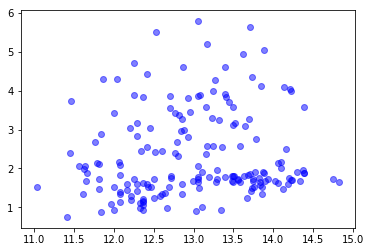

In [14]:
plt.scatter(df['Alcohol'], df['Malic acid'],color='blue', label='input scale', alpha=0.5)

In [15]:
from sklearn import preprocessing

#standard scale transform
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

#min max scale transform
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))



Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


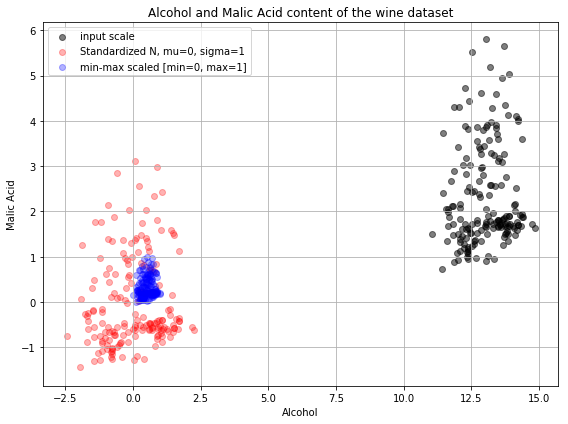

In [16]:
# Plot to show the standardized and normalized data points

plt.figure(figsize=(8,6))

plt.scatter(df['Alcohol'], df['Malic acid'],color='black', label='input scale', alpha=0.5)

plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized N, mu=0, sigma=1', alpha=0.3)

plt.scatter(df_minmax[:,0], df_minmax[:,1],color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show();

## Imputation of Missing Data

Another common need in feature engineering is handling of missing data.
We discussed the handling of missing data in ``DataFrame``s and saw that often the ``NaN`` value is used to mark missing values.

For example, we might have a dataset that looks like this:

In [17]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.
This is known as *imputation* of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

The sophisticated approaches tend to be very application-specific, and we won't dive into them here.
For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the ``Imputer`` class:

In [18]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a ``LinearRegression`` estimator:

## Pandas: fillna

Fill NA/NaN values using the specified method. For more information, read the [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.fillna.html)

In [22]:
import pandas as pd

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

#Fill in missing data with zeros
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [23]:
# Fill in missing in preTestScore with the mean value of preTestScore
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [24]:
# Fill in missing in postTestScore with the median value of postTestScore
df["postTestScore"].fillna(df["postTestScore"].median(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,62.0
2,Tina,Ali,36.0,f,3.0,62.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [25]:
# Fill in missing in age with the ffill
df["age"].fillna(method='bfill', inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,36.0,NaN,3.0,62.0
2,Tina,Ali,36.0,f,3.0,62.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

import matplotlib.pyplot as plt
% matplotlib inline

# may have to pip install graphviz

In [54]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

In [11]:
print(cancer.DESCR)

# data description can also be found here:
# http://scikit-learn.org/stable/datasets/index.html

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [58]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
title ='Logistic regression (malignant vs benign), C = {:.3f}'.format(0.1)


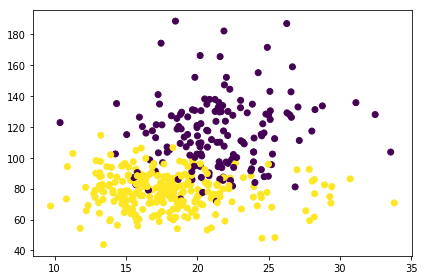

In [59]:
plt.scatter(X_train[:,1], X_train[:,2],c=y_train)
plt.tight_layout()

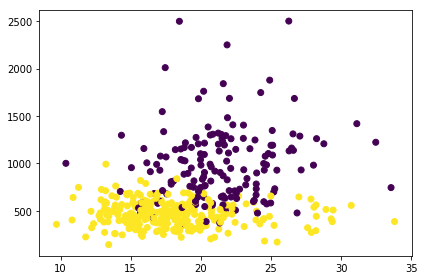

In [60]:
plt.scatter(X_train[:,1], X_train[:,3],c=y_train)
plt.tight_layout()

In [40]:
## Accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


In [45]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFE100', '#00FF00', '#0000FF','#000000'])

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

C:\Users\rgen0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\rgen0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


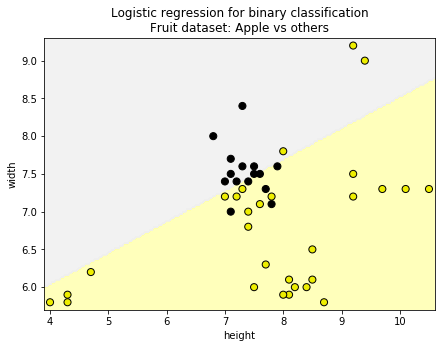

In [47]:
from sklearn.linear_model import LogisticRegression

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)

from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)
subaxes.set_xlabel('height')
subaxes.set_ylabel('width');

C:\Users\rgen0001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


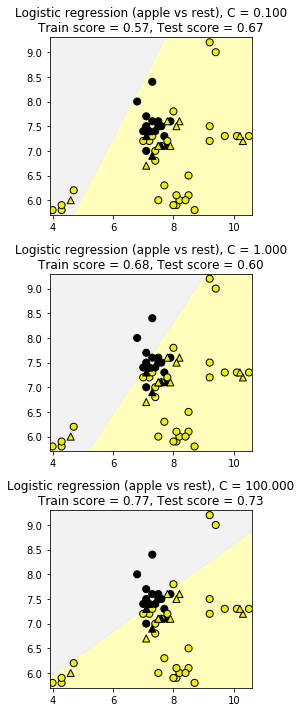

In [49]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(), y_fruits_apple.as_matrix(),random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

Disclaimer:
   
Most of these materials are refered from: https://www.coursera.org/specializations/data-science-python
Please visit the website for detailed information on the subject matter. Credit goes to the original content creator.